# Viga de Euler-Bernoulli

Exemplo baseado na documentação e em livros de Mecânica do Sólidos  
**Notebook por:** Paulo de Souza Silva  
**Data:** Maio/Junho de 2025  
**Notebook modificado por:** Renato César de Carvalho


**IGNORE ESTE CÓDIGO INICIAL**

* Se a figura da viga não aparecer, basta rodá-lo.


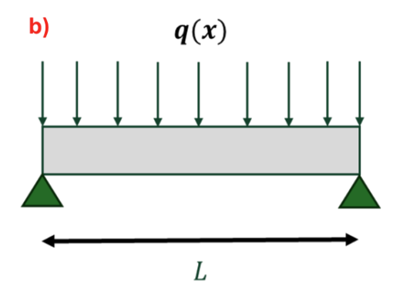

In [ ]:
import requests
from PIL import Image
from io import BytesIO

file_id = '1edxwWuIbEqsOuIIw1E2d2nQD1AX6VrxC'
url = f'https://drive.google.com/uc?export=view&id={file_id}'

response = requests.get(url)
img = Image.open(BytesIO(response.content))

new_size = (400, 300)  # (largura, altura) em pixels
img_resized = img.resize(new_size)

display(img_resized)

## Obtenção da Solução Analítica

A viga engastada com carga distribuída é um problema comum da formulação de Euler-Bernoulli, cujo o formalismo matemático (Gere,2003; Beer, 2017) pode ser expresso por:

$$EI\frac{d^4y}{dx^4} = - w(x)$$

considerando o carregamento para baixo **positivo**.

Por ser uma equação diferencial de quarta ordem a mesma exige quatro condições para ser resolvida.

Das considerações de **força cortante** e **momento fletor**, temos que **nessa configuração da Figura**:
$$V(x) = \frac{wL}{2} - wx \hspace{2cm} M(x) = \frac{wLx}{2} - \frac{wx^2}{2}$$

Para o formalismo adotado, temos que:
$$EI\frac{d^3y}{dx^3} = V(x) \hspace{2cm} EI\frac{d^2y}{dx^2} = M(x)$$

Com isso em mente, podemos resolver a EDO de quarta ordem, basta aplicarmos uma integral quatro vezes e depois considerar as condições.



### Integrações
Como sabemos que w é constante ele não depende de x e logo temos:

### 1ª Integração
$$EIy''' = -wx + C_1 = V(x)$$

### 2ª Integração
$$EIy'' = -w\frac{x^2}{2} + C_1x + C_2= M(x)$$

### 3ª Integração
$$EIy' = -w\frac{x^3}{6} + C_1\frac{x^2}{2} + C_2x + C_3$$

### 4ª Integração
$$EIy = -w\frac{x^4}{24} + C_1\frac{x^3}{6} + C_2\frac{x^2}{2} + C_3x + C_4$$

Agora vamos analisar, as condições de contorno e as definições de momento fletor e força cortante para encontrar as constantes.

Na articulação ($x=0$), nós não teremos deslocamentos, o que leva a:
$$y(x=0) = 0$$

o que implica das integrações 4 que

$$\fbox{$ C_4 = 0$}$$

Na articulação da extremidade esquerda, fletor e cortante valem:
$$V(0) = \frac{wL}{2} \hspace{2cm} M(0) = 0$$

da 1ª integração:
$$-w0 + C_1 = V(x) = \frac{wL}{2} \Rightarrow \fbox{$C_1 = \frac{wL}{2}$}$$
desse resultado, do momento fletor e da segunda integração
$$-w\frac{0^2}{2} + C_10 + C_2= M(x) = 0 \Rightarrow \fbox{$C_2 = 0$}$$

Para ($x=L$), nós não teremos deslocamentos, o que leva a:
$$y(x=L) = 0$$
$$EI0 = -w\frac{L^4}{24} +\frac{wL}{2}\frac{L^3}{6} + 0\frac{L^2}{2} + C_3L$$
$$\fbox{$ C_3 = -\frac{wL^3}{24}$}$$

Assim, podemos então substituir na quarta integral e passar a relação EI dividindo e encontramos a equação do deslocamento dessa viga

$$y = -\frac{w}{24EI}(x^4 -2Lx^3 + L^3 x)$$

> **Obs:** É preciso ter muito cuidado com relação aos sinais (que devem ser adotados de maneira coerente), em algumas literaturas  é possível encontrar:
$$EI\frac{d^4y}{dx^4} = w(x)$$
nesse caso, assume-se que o carregamento para baixo é **negativo**

> **Obs2:** A equação diferencial de quarta ordem que governa o problema foi admensionalizada para evitar problemas relacionados aos parâmetros utilizados nela. Percebi que quando temos valores elevados de E, ou I, ou talvez quando a ordem de grandeza desse parametros é muito diferente, a PINN tem bastante dificuldade para calcular resultados válidos, mesmo que haja convergência. Tentei considerar diferentes unidades, mas não funcionou. Única solução que encontrei foi admensionalizar a EDO, como segue:

$$ \overset ax=\frac{\overset dx}L\\Onde\;\overset dx\;é\;a\;coordenada\;x\;dimensional\;0\leqslant\overset dx\leqslant L\\e\;\overset ax\;é\;a\;coordenada\;x\;admensional\;0\leqslant\overset ax\leqslant 1 $$

$$ \overset ay=\frac{\overset dy}L\\Onde\;\overset dy\;é\;a\;coordenada\;y\;dimensional\\e\;\overset ay\;é\;a\;coordenada\;x\;admensional $$

$$ \overset aw=\frac{\overset d{w\;}L^3}{EI}\\Onde\;\overset dw\;é\;a\;carga\;distrubuida\;dimensional\\e\;\overset aw\;é\;a\;carga\;distrubuida\;admensional $$

$$ \frac{d^4{\displaystyle\overset ay}}{d{\displaystyle\overset ax}^4}+\overset a{w} =0$$

**referências**  
Beer, F., E. Johnston, J. DeWolf and D. Mazurek. Mechanics of Materials, 7e in SI Units. Stress 1.11 (2017): 1-12.  
Gere, J. M. Mecânica dos Materiais, Editora Thomson Learning. 2003.

## Resolução da Viga com DeepXDE

**instalar o DeepXDE no Colab**

[Installation DeepXDE](https://deepxde.readthedocs.io/en/latest/user/installation.html)

* Para instalar no Colab, usamos antes do `pip` o símbolo `!`
* Para a célula ficar limpa ao fim da instalação adicionamos o `-q` entre o `install` e o nome da biblioteca

In [ ]:
! pip install -q deepxde

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 7.3 MB/s eta 0:00:00


**bibliotecas principais**

* Aqui chamamos as bibliotecas principais que são padrões como `numpy` e o `matplotlib`
* Além delas, é claro, vamos chamar o `deepxde`; como ele tem como backends o `tensorflow, pytorch, jax` e o `paddle` uma dessas também tem que ser chamada, escolheremos o pytorch.
* Devemos dizer ao DeepXDE que o pytorch será nosso backend e usamos o comando `backend.backend_name`

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import deepxde as dde
import torch
dde.backend.backend_name = "pytorch"

No backend selected.
Finding available backend...


Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Instructions for updating:
non-resource variables are not supported in the long term


Found tensorflow.compat.v1
Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)


**parâmetros do problema**

In [ ]:
L = 6 # m
w = 2 # kN/m
E = 2.1e8 # N/m^2
I = 22.5e-5 # m^4
EI = E*I

**solucao analitica**

In [ ]:
def func(x):
    return -(w/(24*EI))*((x**4)-2*L*(x**3)+(L**3)*x)

**Definindo o Intervalo**

Como temos um problema 1D, podemos definir o intervalo com auxílio da **classe** `geometry`
* `geometry.geometry_1d.Interval(l,r)`

em que l é o valor a esquerda e r o valor a direita (no nosso caso a origem até o comprimento da viga)

Lembre-se que a comprimento da viga foi adimensionalizado. Logo varia de 0 até 1.

In [ ]:
geom = dde.geometry.geometry_1d.Interval(0, 1)

### Derivadas Uteis e Definicao da EDO do problema

Como estamos usando o Pytorch, podemos fazer as derivadas considerando o uso da classe `grad` (remete a gradiente e as funções autograd, internas as bibliotecas como o próprio Pytorch, TensorFlow etc)

A estratégia é, calcular a derivada segunda e a derivada terceira em um primeiro momento, para serem usadas nas condições de contorno.

Para isso usamos as opções `grad.hessian` e `grad.jacobian`

> **1. JACOBIANO**
* Para um função escalar $f(x)$, o Jacobiano é simplemente a **primeira derivada** com respeito a variável  
$$\frac{df}{dx}$$
* Para um função multivariável $f(x,y)$ em 2D, o Jacobiano é um vetor de derivadas parciais com relação a cada variável.  
$$J = \begin{bmatrix}
\frac{\partial f}{\partial x} \\
\frac{\partial f}{\partial y}
\end{bmatrix}$$

> **2. HESSIANO**
* O Hessiano é uma matriz de derivadas parciais de segunda ordem;
* Para um função escalar $f(x)$ em 1D, é apenas a **segunda derivada** com respeito a $x$.
$$\frac{d^2f}{dx^2}$$
* Para um função multivariável $f(x,y)$ em 2D, é uma matriz que inclui todos derivaradas de segunda ordem possível.
$$H = \begin{bmatrix}
\frac{\partial^2f}{\partial x^2} & \frac{\partial ^2f}{\partial x \partial y} \\
\frac{\partial^2f}{\partial y \partial x} & \frac{\partial^2f}{\partial y^2}
\end{bmatrix}$$

**Ver vídeo:** [DeepXDE Tutorial 2](https://youtu.be/Nsf5bmI54oc?si=gkTdPnNFhr7ZWYDi)

Uma estratégia similar decorre para a EDO do nosso problema, que tem derivada de 4 ordem.

In [ ]:
# Derivadas de Ordem 2
def ddy(x, y):
    return dde.grad.hessian(y, x)

# Derivada de Ordem 1 da Derivada de Ordem 2 (3 Derivada)
def dddy(x, y):
    return dde.grad.jacobian(ddy(x, y), x)

In [ ]:
# Definicao da EDO do problema
def pde(x, y):
    # Chamando a funcao da derivada segunda
    dy_xx = ddy(x, y)
    # Usando o Hessiano para derivar duas vezes (4 ordem)
    dy_xxxx = dde.grad.hessian(dy_xx, x)
    return dy_xxxx + (w*(L**3))/(E*I)


### Condições de Contorno

Como estamos trabalhando em um problema 1D, os pontos de teste que usamos são sempre conferidos somente **um de cada vez** tornando-se **um ponto** do domínio, logo:
* Se estamos olhando **na esquerda do domínio** `x[0]`$\approx$ `0`
* Se estamos olhando **na direita do domínio** `x[0]`$\approx$ `L`

Se o dominio fosse bi-dimensional, **cada ponto** teria **duas coordendas** `x[0]` e `x[1]`

Dessa forma e pra evitar erros numéricos, podemos definir que:
* o contorno a esquerda (`boundary_l`) e
* a direita (`boundary_r`)

podem ser definidos como segue, em que retornam um valor verdadeiro para:
* `x[0]` próximo a zero e
* `x[0]` próximo a L.

Já o `on_boundary` é um **booleano** que o próprio DeepXDE vai definir para que a avaliação seja de fato feita **somente na fronteira**.

In [ ]:
def boundary_l(x, on_boundary):
    return on_boundary and dde.utils.isclose(x[0], 0)

def boundary_r(x, on_boundary):
    return on_boundary and dde.utils.isclose(x[0], 1)

Seguindo com relação as condições de contorno, como definidos de fato quais pontos são nas fronteiras, podemos declarar as quatro condições:
* bc1 - $y$ em x = 0 deve ser nula (**condição de Dirichlet**)
* bc2 - $y$ em x = 1 deve ser nula (**condição de Dirichlet**)
* bc3 - $d^2y/dx^2$ em $x = 0$ deve ser nulo (**Momento Fletor**)  
* bc4 - $d^2y/dx^2$ em $x = 1$ deve ser nulo (**Momento Fletor**)

* Para bc1 e bc2 existe uma classe específica **`icbc.DirichletBC`**

* Como bc3 e bc4 exigem expressões além das condições tradicionais, devemos usar uma terceira classe que é a **`icbc.OperatorBC`** (funciona como uma função resíduo).

Dentro de cada uma delas, precisamos definir:
* geometria,
* uma função (ou valor via função), e
* qual posição do contorno

In [ ]:
bc1 = dde.icbc.DirichletBC(geom, lambda x: 0, boundary_l)
bc2 = dde.icbc.DirichletBC(geom, lambda x: 0, boundary_r)
bc3 = dde.icbc.OperatorBC(geom, lambda x, y, _: ddy(x, y), boundary_r)
bc4 = dde.icbc.OperatorBC(geom, lambda x, y, _: ddy(x, y), boundary_l)

**Obs:** `_` aqui é um *placeholder* para input_gradients, se precisar (não usado aqui).

### Dados para o DeepXDE
[Modulo data.pde](https://deepxde.readthedocs.io/en/latest/modules/deepxde.data.html#module-deepxde.data.pde)

Agora que temos a nossa equação diferencial e as condições de contorno, definimos o conjunto de **"dados"** para nossa rede, na ocasião devemos usar o módulo `data.PDE` dentro dele chamamos e definimos:
* `geometry` - geometria
* `pde` - equação diferencial
* `bcs` - as condições de contorno
* `num_domain` número inteiro de pontos dentro do domínio para o **treinamento**
* `num_boundary` número inteiro de pontos de **treino** na fronteira
* `num_test` número inteiro de pontos de **teste**

Outras coisas podem ser definidas, como: **tipo de distribuição** para os dados de treinamento, dados de uma **solução de referência** etc

In [ ]:
data = dde.data.PDE(
    geom,
    pde,
    [bc1, bc2, bc3, bc4],
    num_domain=100,
    num_boundary=10,
)

In [ ]:
# data = dde.data.PDE(
#     geom,
#     pde,
#     [bc1, bc2, bc3, bc4],
#     num_domain=10,
#     num_boundary=2,
#     solution=func,
#     num_test=100,
# )

### Criação da Rede
[PytorchFNN](https://deepxde.readthedocs.io/en/latest/modules/deepxde.nn.pytorch.html#module-deepxde.nn.pytorch.fnn)

Agora, precisamos definir o **formato** da nossa rede, sua **função de ativação**, o **tipo de inicializador** dos pesos e vieses etc:

* Vamos adotar **1 entrada**, **1 saída** e **3 camadas ocultas** com **20 neurônios**
* rede Fully-Connected (FNN)
* Nossa função de ativação será a **tangente hiperbólica `tanh`**
* A função de inicialização de pesos será a **`Glorot uniform`**

In [ ]:
layer_size = [1] + [50]*5 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

### Modelo e Otimização
Com os **dados** e o **formato da rede definidos**, montamos nosso **modelo** e colocamos ele para **otimizar/treinar**.

* Para definir o modelo usamos o **classe** `Model(data,net)`
* A esse modelo definimos configurações para o treino como:
  * **Otimizador:** (Adam, BFGS)
  * **Taxa de aprendizado** (*lr*)
  * **metricas:** são métricas desejadas para serem calculadas durante o treino, pode ser usada quando existem dados iniciais

Com esses parâmetros definidos, podemos treinar o modelo, sendo possível definir:
* `iterations`: número de iterações (épocas)
* `batch_size`:
* `display_every`: a cada quantas épocas deve ser printado o avanço (padrão é 1000)  

Como retorno tem *losshistory* e *train_state*

In [ ]:
model = dde.Model(data, net)
#model.compile("adam", lr=0.001, metrics=["l2 relative error"])
model.compile("adam", lr=0.001)
N_iter = 2000
step = 200
losshistory, train_state = model.train(iterations=N_iter,display_every=step)

Compiling model...
'compile' took 2.136289 s

Training model...

Step      Train loss                                            Test loss                                             Test metric
0         [3.47e-01, 0.00e+00, 2.85e-02, 4.17e-02, 0.00e+00]    [3.47e-01, 0.00e+00, 2.85e-02, 4.17e-02, 0.00e+00]    []  
200       [2.77e-05, 6.15e-11, 1.73e-09, 1.36e-06, 2.37e-06]    [2.77e-05, 6.15e-11, 1.73e-09, 1.36e-06, 2.37e-06]    []  
400       [1.75e-05, 6.67e-09, 1.21e-08, 1.72e-06, 2.08e-06]    [1.75e-05, 6.67e-09, 1.21e-08, 1.72e-06, 2.08e-06]    []  
600       [1.07e-05, 2.67e-09, 5.47e-09, 8.39e-07, 1.54e-06]    [1.07e-05, 2.67e-09, 5.47e-09, 8.39e-07, 1.54e-06]    []  
800       [5.46e-06, 6.59e-10, 2.08e-09, 3.54e-07, 1.09e-06]    [5.46e-06, 6.59e-10, 2.08e-09, 3.54e-07, 1.09e-06]    []  
1000      [2.01e-06, 5.94e-11, 6.26e-10, 1.14e-07, 6.14e-07]    [2.01e-06, 5.94e-11, 6.26e-10, 1.14e-07, 6.14e-07]    []  
1200      [5.20e-07, 3.40e-12, 9.77e-11, 2.10e-08, 2.19e-07]    [5.

**graficos**

Para avaliar os resultados finais, vamos definir:
* Um vetor no eixo x para PINN variando de 0 até 1 para ser utilizado nos cálculos da PINN
* Outro vetor no eixo x para PINN para ser utilizado para plotar valores depois
* Um vetor no eixo x para solução exata
* Calcular o valor adimensionalizado predito pela .
* Calculo do valor y da PINN dimensionalizado (basta multiplicar pelo comprimento da viga).
* Calcular o valor exato
* Plotar os gráficos das soluções em conjunto

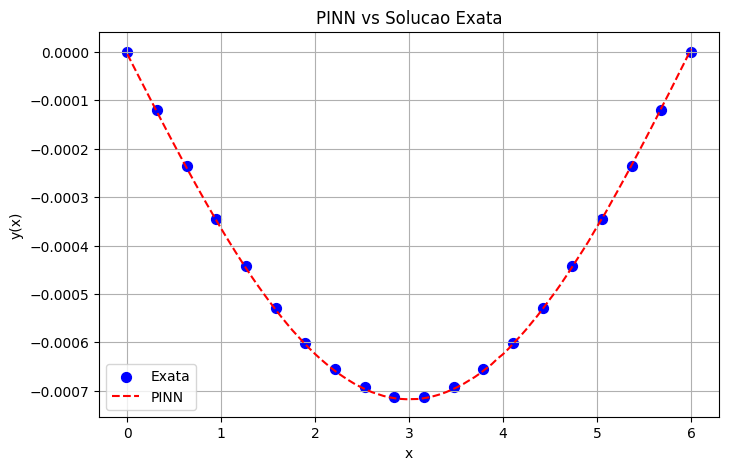

In [ ]:
# Definindo X_PINN e Y_PINN
x_pinn = np.linspace(0,1,100).reshape(-1,1)
y_pinn = model.predict(x_pinn)
x_pinn_dimensional = np.linspace(0,6,100).reshape(-1,1)
y_pinn_dimensional = y_pinn*L

# Calculo da solucao exata
x_exato = np.linspace(0,6,20).reshape(-1,1)
y_exato = func(x_exato)

# Plotando a PINN vs a solucao exata
plt.figure(figsize=(8,5))
plt.scatter(x_exato, y_exato, label = 'Exata', color = 'blue', marker = "o", s = 50)
plt.plot(x_pinn_dimensional, y_pinn_dimensional, label = 'PINN', color = "red", linestyle = "--")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("PINN vs Solucao Exata")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Curva da funçoes de perda da PDE, ICBCs e Total
losses = np.array(losshistory.loss_train)
print(np.shape(losses))
pde_loss_plot = losses[:,0]
icbc_loss_plot = np.array(np.sum(losses[:,1:],1))
print(np.shape(icbc_loss_plot))
total_loss_plot = pde_loss_plot + icbc_loss_plot

(11, 5)
(11,)


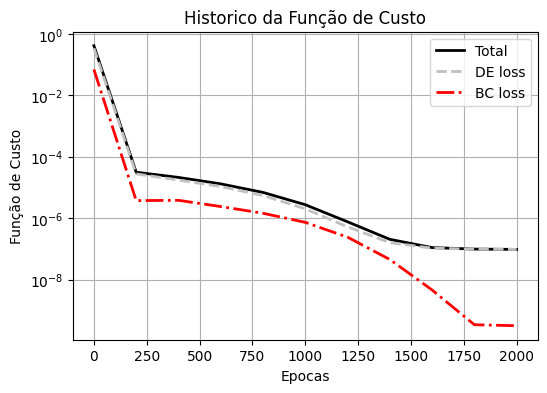

In [ ]:
plt.figure(figsize=(6,4))
epocas = np.linspace(0,N_iter,np.size(pde_loss_plot))
plt.plot(epocas,total_loss_plot, 'k', linewidth=2, label="Total")
plt.plot(epocas,pde_loss_plot, color='silver', linestyle='--', linewidth=2, label="DE loss")
plt.plot(epocas,icbc_loss_plot, color='r', linestyle='-.', linewidth=2, label="BC loss")

plt.xlabel('Epocas')
plt.ylabel('Função de Custo')
plt.yscale('log')
plt.title('Historico da Função de Custo')
plt.legend()
plt.grid(True)
plt.show()